In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [3]:
conn_str = os.getenv('CRAIGGER_CONN') #make sure the tunnel is open
engine = create_engine(conn_str)

In [4]:
pd.read_sql('SELECT * FROM cragprod LIMIT 2;', con=engine)

,data_accuracy,housing,post_price,og:url,post_sqft,post_bedroom_count,crawl_date,geo.placename,mapaddress,og:title,post_datetime,price,post_hood,geo.region,furnished,netloc,price_per_sqft,post_date
0,5,/ 3br - 1304ft2 -,2829,https://inlandempire.craigslist.org/apa/d/rive...,1304.0,3,2021-12-09,Riverside,600 Central Ave,"Disposal, Spanish Speaking Staff, Air Conditio...",2021-12-08 14:59,"$2,829",( ),US-CA,False,inlandempire.craigslist.org,2.169479,2021-12-08
1,5,/ 1br - 750ft2 -,1981,https://inlandempire.craigslist.org/apa/d/upla...,750.0,1,2021-12-09,Upland,1540 West 8th St,Start the NEW YEAR in a NEW apartment Home! - ...,2021-12-08 14:58,"$1,981","(1540 West 8th St, Upland, CA )",US-CA,False,inlandempire.craigslist.org,2.641333,2021-12-08


In [8]:
netlocs = ('sfbay.craigslist.org', 'losangeles.craigslist.org',
           'miami.craigslist.org', 'austin.craigslist.org'
#           'sacramento.craigslist.org', 'orangecountry.craigslist.org',
          )
df = pd.read_sql(f"SELECT post_date, netloc, post_price, price_per_sqft FROM cragprod WHERE netloc IN {netlocs};", 
                 parse_dates=['post_date'],
                 con=engine)
print(df.netloc.value_counts())
df.sample(5)

sfbay.craigslist.org         127164
losangeles.craigslist.org    122897
miami.craigslist.org          62844
austin.craigslist.org         54616
Name: netloc, dtype: int64


,post_date,netloc,post_price,price_per_sqft
12613,2021-12-27,sfbay.craigslist.org,3525,2.918046
120880,2020-11-07,sfbay.craigslist.org,3800,2.676056
224556,2021-05-05,sfbay.craigslist.org,1715,2.722222
9418,2021-12-22,miami.craigslist.org,2385,2.461300
245010,2021-06-05,sfbay.craigslist.org,6795,NaN


<AxesSubplot:xlabel='post_date'>

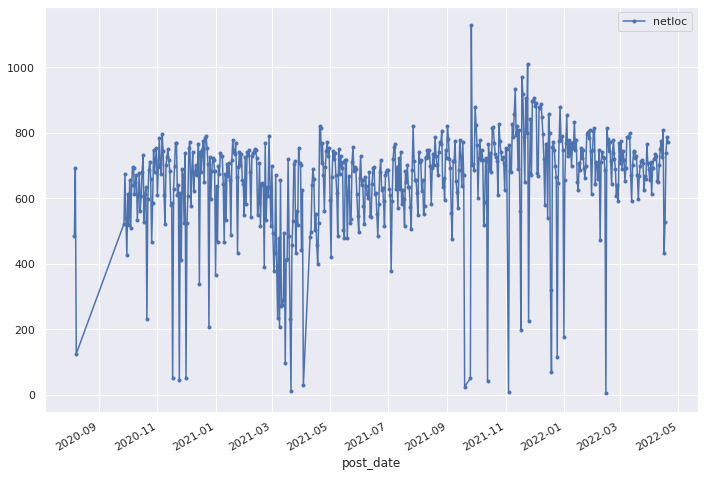

In [9]:
df.groupby('post_date').count().reset_index().plot(x='post_date', y='netloc',marker='.')

<AxesSubplot:xlabel='post_date', ylabel='price_per_sqft'>

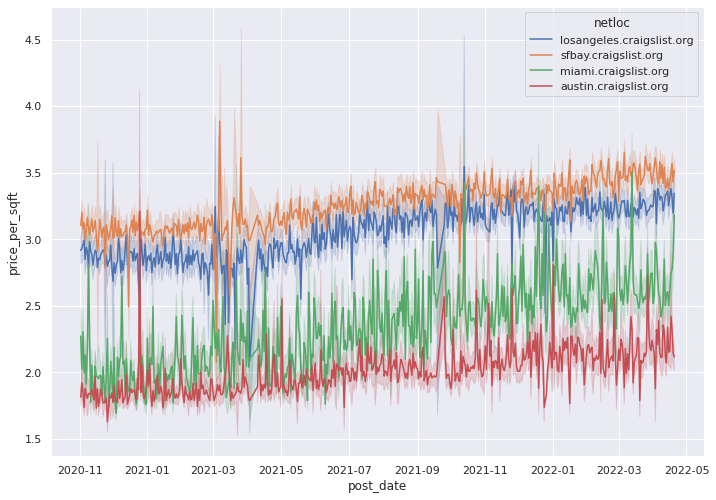

In [10]:
dfp = df[(df.post_date > pd.to_datetime('2020-11-01'))
         & (1.5 < df.price_per_sqft)
         & (df.price_per_sqft < 5.0)].dropna()

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y="price_per_sqft", 
    x="post_date",
    hue="netloc", 
    data=dfp)